Understanding how the velocities in the Mag Stream will change owing to the reflex motion of the MW disk.

In [3]:
#from plotting import *
#%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm


In [4]:
# Load in all the Stream particle data

all = np.loadtxt('AllGas_Model1.txt') # original B12 Model 1

# Galactocentric coords
# x y z 
x = all[:,0] 
y = all[:,1]
z = all[:,2]  
r = np.sqrt(x**2 + y**2 +z**2)

# velocities
vx = all[:,3]
vy = all[:,4]
vz = all[:,5]

v =np.sqrt(vx**2 + vy**2 + vz**2) 


In [5]:
# For reference,  LMC  COM V and P  K13 

Lx = -1.06771
Ly = -41.04967
Lz = -27.83253
Lvx = -57.40
Lvy = -225.59
Lvz = 220.67


In [121]:
      
# Heliocentric motion
# Schonrich 2010 peculiar motion
# McMillan 2011 local standard of rest
# not used
Svx = 11.1
Svy = 12.24 + 220 # 239  Assuming IAU standard for comparison with teh obs data and sim set up of 2012 
Svz = 7.25
Rxsun = -8.3

Svy2 = 12.24 + 239 # correct value for turning the sim to observer frame (other way around) 

In [19]:
# Galactocentric Radial and Tangential Velocties

vrad = (vx*x + vy*y + vz*z )/r
vtan = np.sqrt(v**2 - vrad**2 )


In [20]:
# Heliocentric Radial and Tangential Velocities

rH = np.sqrt((x-Rxsun)**2 + (y)**2 + z**2) 

vradH = ( (vx-Svx)*(x-Rxsun) + (vy-Svy)*y + (vz-Svz)*z )/rH

In [21]:
# Galactic and Magellanic Stream Coordinates

# Original B12 
all = np.loadtxt('AllGasPos_Model1.txt')


# Galactic l, b
l = all[:,0] 
b = all[:,1]
# Magellanic l, b
ML = all[:,2]  
MB = all[:,3]



In [30]:
# Nico's reflex velocities  for Model LMC5 B1 

Ref = np.loadtxt('lbd_Model1_reflex.txt')
# l [degrees], b[degrees], d [kpc], vx rflx, vy rflx, vz rflx, vx rflx (50 kpc), vy rflx (50 kpc), vz rflx (50 kpc), vr [km/s] 
# (50) assumes a set distance of 50 kpc , the other accounts for the distance of the particles. 
# i think it should be in the same order. as ML, MB
# testing d= Ref[2]


In [91]:
# some of Nico's values are Nan for some reason. ** need to fix this. 

idxA = np.where(np.isnan(Ref[:,3]))
idxB = np.where(np.isnan(Ref[:,3])== False) # not nan

In [95]:
len(idxB[0])

458741

In [129]:
# New Heliocentric velocities including the reflex motion. 

# assuming relative motion as a function of distance
vradHRef = ( (vx-Svx-Ref[:,3])*(x-Rxsun) + (vy-Svy-Ref[:,4])*y + (vz-Svz-Ref[:,5])*z )/rH

# Assuming all at 50 kpc
vradHRef50 = ( (vx-Svx-Ref[:,6])*(x-Rxsun) + (vy-Svy-Ref[:,7])*y + (vz-Svz-Ref[:,8])*z )/rH

# assuming JUST the disk COM velocity
vxd = 10.34109411  
vyd = 28.95649597 
vzd = -39.88921287
vradHRefDisk = ( (vx-Svx-vxd)*(x-Rxsun) + (vy-vyd)*y + (vz-Svz-vzd)*z )/rH


Understanding how the velocities in the Mag Stream will change owing to the decrease in velocity from entrainment.


#Decreasing velocity: 
#From Evan on FEb 2 2021
To first order, every time you entrain 100% of the initial mass,
you slow the velocities of the initial “clouds” by 50% (because momentum conservation),
so you can imagine if the stream now has 4x the mass that was ejected from the SMC,
and the SMC is moving at 200km/s relative to the halo,
the gas in the stream (at least the tail) should be moving at more like 50km/s.


So if double mass, velocities drop by half - but in direction of motion. 

In [122]:
# Reducing speeds by 50% for gas drag -- now assuming the correct solar Vy SVy2
# doubled mass, momentum conservation.
# using the higher solar velocity values to now take the "simulation" to observation regime 
#(wiuthout requireing it to match teh data -- matching data requires 220 ) 
vradH_half = ( (vx/2-Svx)*(x-Rxsun) + (vy/2-Svy2)*y + (vz/2-Svz)*z )/rH

# reducing speed by 3
vradH_third = ( (vx/3-Svx)*(x-Rxsun) + (vy/3-Svy2)*y + (vz/3-Svz)*z )/rH



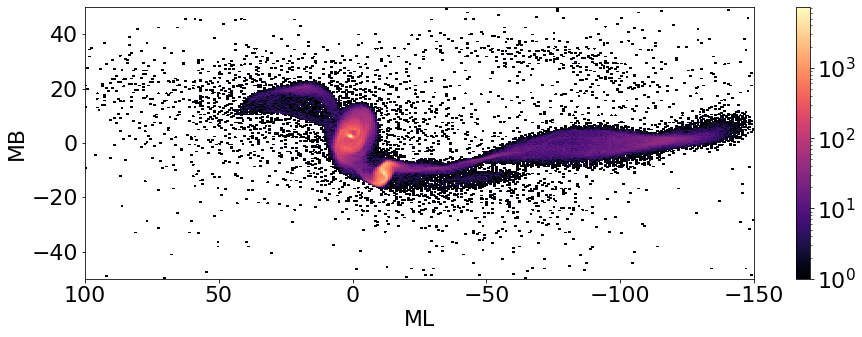

In [22]:
# Stream density in Mag L and Mag B
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(ML, MB, bins=500, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('ML', fontsize=22)
plt.ylabel('MB', fontsize=22)

#set axis limits
plt.xlim(100, -150)
plt.ylim(-50,50)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

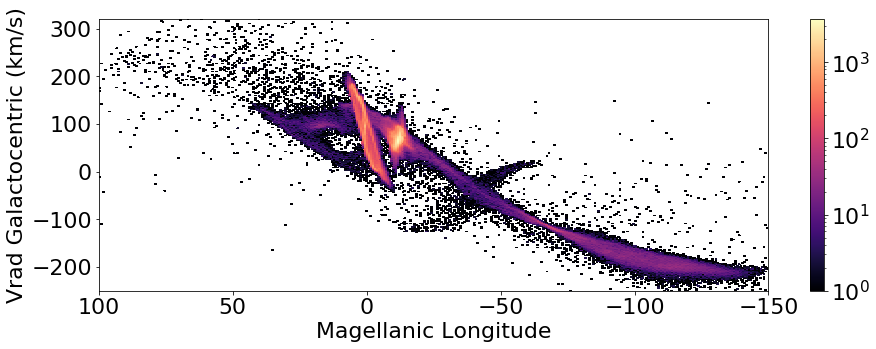

In [23]:
# Stream density in Vrad vs MagL
# Galactocentric 
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(ML, vrad, bins=500, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('Magellanic Longitude', fontsize=22)
plt.ylabel('Vrad Galactocentric (km/s)', fontsize=22)

#set axis limits
plt.xlim(100,-150)
plt.ylim(-250,320)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

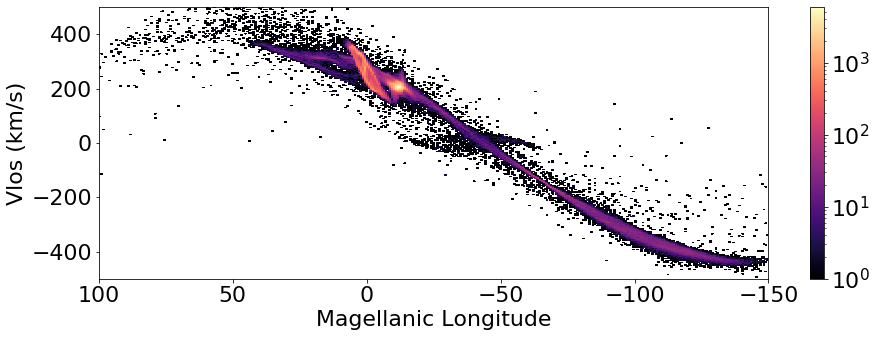

In [27]:
# Stream density in Vlos vs MagL
# Heliocentric 
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(ML, vradH, bins=500, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('Magellanic Longitude', fontsize=22)
plt.ylabel('Vlos (km/s)', fontsize=22)

#set axis limits
plt.xlim(100,-150)
plt.ylim(-500,500)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

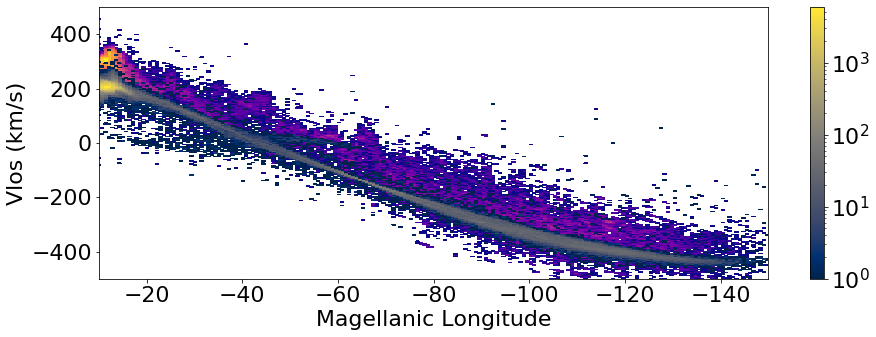

In [105]:
# Stream density in Vlos vs MagL With Reflex motion corrections 
# Heliocentric 
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(ML[idxB], vradHRef[idxB], bins=500, norm=LogNorm(), cmap='plasma')
plt.hist2d(ML, vradH, bins=500, norm=LogNorm(), cmap='cividis')

plt.colorbar()

# Add axis labels
plt.xlabel('Magellanic Longitude', fontsize=22)
plt.ylabel('Vlos (km/s)', fontsize=22)

#set axis limits
plt.xlim(-10,-150)
plt.ylim(-500,500)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

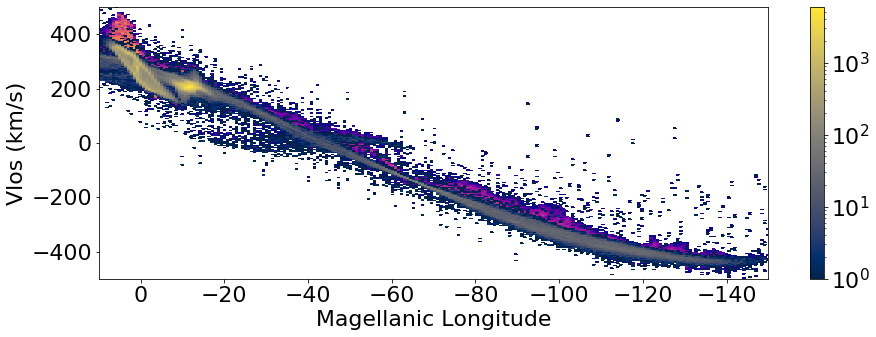

In [109]:
# Stream density in Vlos vs MagL With Reflex motion corrections  BUT assuming. 50 kpc for everything
# Heliocentric 
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(ML, vradHRef50, bins=500, norm=LogNorm(), cmap='plasma')
plt.hist2d(ML, vradH, bins=500, norm=LogNorm(), cmap='cividis')

plt.colorbar()

# Add axis labels
plt.xlabel('Magellanic Longitude', fontsize=22)
plt.ylabel('Vlos (km/s)', fontsize=22)

#set axis limits
plt.xlim(10,-150)
plt.ylim(-500,500)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

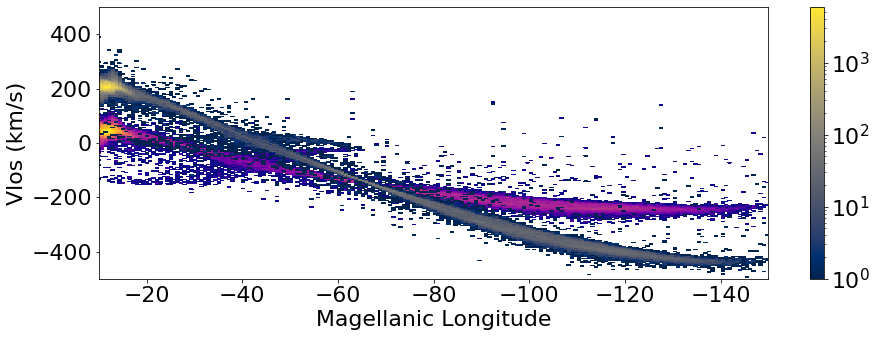

In [130]:
# Stream density in Vlos vs MagL With Reflex motion corrections but using DISK COM only
# Maximal case ?? 
# Heliocentric 
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(ML, vradHRefDisk, bins=500, norm=LogNorm(), cmap='plasma')
plt.hist2d(ML, vradH, bins=500, norm=LogNorm(), cmap='cividis')

plt.colorbar()

# Add axis labels
plt.xlabel('Magellanic Longitude', fontsize=22)
plt.ylabel('Vlos (km/s)', fontsize=22)

#set axis limits
plt.xlim(-10,-150)
plt.ylim(-500,500)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

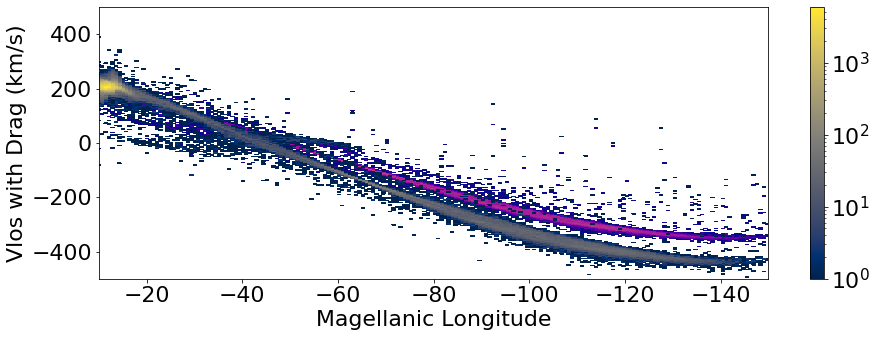

In [123]:
# Stream density in Vlos  vs MagL  but Vlos half the speed assuming 2x entrainment
# Heliocentric using 239 km.s 
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(ML, vradH_half, bins=500, norm=LogNorm(), cmap='plasma')
plt.hist2d(ML, vradH, bins=500, norm=LogNorm(), cmap='cividis')

plt.colorbar()

# Add axis labels
plt.xlabel('Magellanic Longitude', fontsize=22)
plt.ylabel('Vlos with Drag (km/s)', fontsize=22)

#set axis limits
plt.xlim(-10,-150)
plt.ylim(-500,500)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

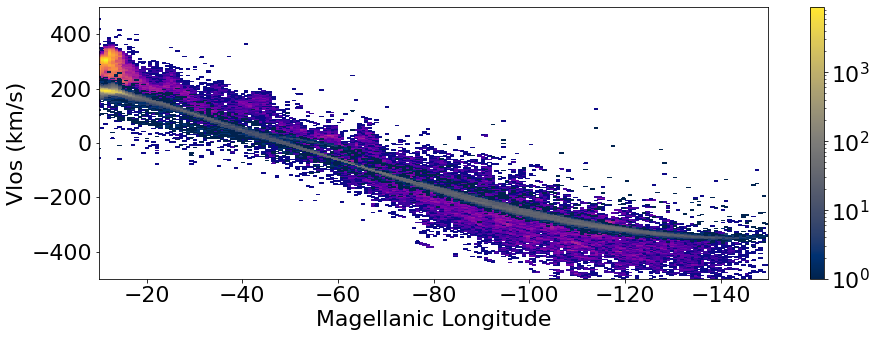

In [124]:
# Stream density in Vlos vs MagL With Reflex motion corrections and comparing against the case with Drag
# Heliocentric assuming 220 km/s for reflex corrections and 239 for drag case.
# idea si that reflex corrections are to the original model which i'm mimicking as "truth" orignal model needs 220 to mathc obs.
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(ML[idxB], vradHRef[idxB], bins=500, norm=LogNorm(), cmap='plasma')
plt.hist2d(ML, vradH_half, bins=500, norm=LogNorm(), cmap='cividis')

plt.colorbar()

# Add axis labels
plt.xlabel('Magellanic Longitude', fontsize=22)
plt.ylabel('Vlos (km/s)', fontsize=22)

#set axis limits
plt.xlim(-10,-150)
plt.ylim(-500,500)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

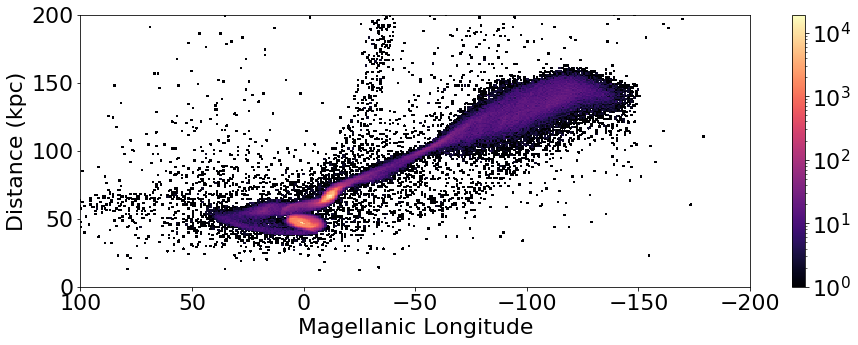

In [34]:
# Stream density in ML vs Distance
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

# plot the particle density for M31 
plt.hist2d(ML, r, bins=500, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('Magellanic Longitude', fontsize=22)
plt.ylabel('Distance (kpc)', fontsize=22)

#set axis limits
plt.xlim(100,-200)
plt.ylim(0,200)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

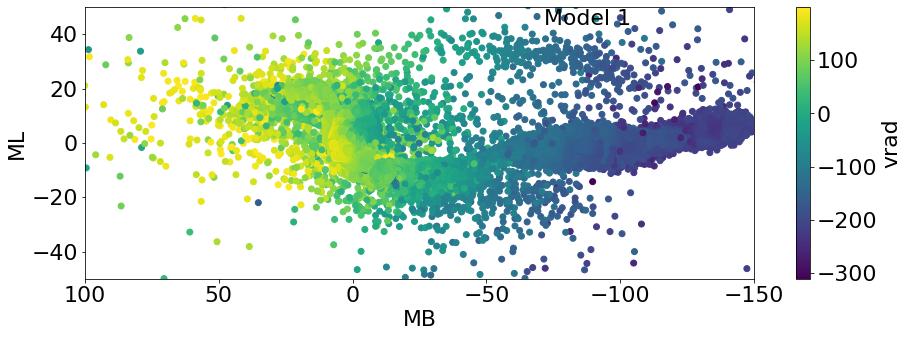

In [9]:
# Galactocentric Vrad 

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

index = np.where( (vrad < 200) & (r < 170))

plt.scatter(ML[index],MB[index],c=vrad[index]) # , norm=matplotlib.colors.LogNorm())


#colorbar
cbar = plt.colorbar()
cbar.set_label('vrad', size=22)


#labels
plt.ylabel('ML', fontsize=22)
plt.xlabel('MB', fontsize=22)

plt.figtext(0.55, 0.83, 'Model 1', fontsize=22)

#adjust tick label font size
label_size = 15
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
#set axis limits
plt.xlim(100,-150)
plt.ylim(-50,50)

#set axis limits
#plt.xlim(0,150)
#plt.ylim(-250,0)



#def yfunc2(xx):
#    return 1.5 + 0*xx
#a = np.arange(0,13.0,0.1)
#plt.plot(a,yfunc2(a), linewidth=5.0, linestyle='--', c='r')

#plt.figtext(0.63, 0.21, '1.5 Mpc', fontsize=20)#


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

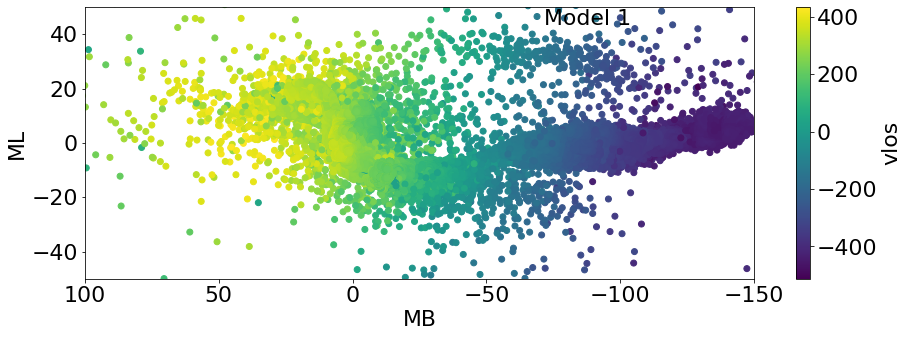

In [28]:
# Heliocentric VLOS

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

index = np.where( (vrad < 200) & (r < 170))

plt.scatter(ML[index],MB[index],c=vradH[index]) # , norm=matplotlib.colors.LogNorm())


#colorbar
cbar = plt.colorbar()
cbar.set_label('vlos', size=22)


#labels
plt.ylabel('ML', fontsize=22)
plt.xlabel('MB', fontsize=22)

plt.figtext(0.55, 0.83, 'Model 1', fontsize=22)

#adjust tick label font size
label_size = 15
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
#set axis limits
plt.xlim(100,-150)
plt.ylim(-50,50)

#set axis limits
#plt.xlim(0,150)
#plt.ylim(-250,0)



#def yfunc2(xx):
#    return 1.5 + 0*xx
#a = np.arange(0,13.0,0.1)
#plt.plot(a,yfunc2(a), linewidth=5.0, linestyle='--', c='r')

#plt.figtext(0.63, 0.21, '1.5 Mpc', fontsize=20)#


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

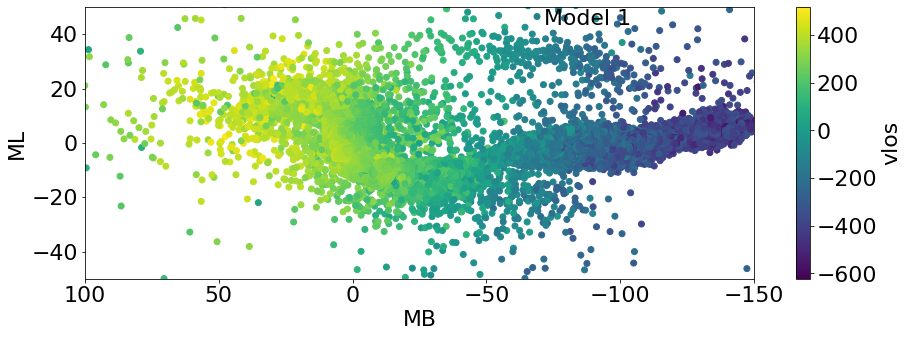

In [128]:
# Heliocentric VLOS with Reflex corrections.  

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

indexA = np.where( (vrad < 200) & (r < 170) & (np.isnan(Ref[:,3])== False))

plt.scatter(ML[indexA],MB[indexA],c=vradHRef[indexA]) # , norm=matplotlib.colors.LogNorm())


#colorbar
cbar = plt.colorbar()
cbar.set_label('vlos', size=22)


#labels
plt.ylabel('ML', fontsize=22)
plt.xlabel('MB', fontsize=22)

plt.figtext(0.55, 0.83, 'Model 1', fontsize=22)

#adjust tick label font size
label_size = 15
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
#set axis limits
plt.xlim(100,-150)
plt.ylim(-50,50)

#set axis limits
#plt.xlim(0,150)
#plt.ylim(-250,0)



#def yfunc2(xx):
#    return 1.5 + 0*xx
#a = np.arange(0,13.0,0.1)
#plt.plot(a,yfunc2(a), linewidth=5.0, linestyle='--', c='r')

#plt.figtext(0.63, 0.21, '1.5 Mpc', fontsize=20)#


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size